In [2]:
import json

In [ ]:
import json
from pathlib import Path

def combine_train_test_from_file(json_file_path):
    """Process a single JSON file and return its combined data."""
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    combined = [(item['input'], item['output']) for item in data['train'] + data['test']]
    
    return combined

def process_all_json_files(folder_path):
    """Process all JSON files in the given folder."""
    master_list = []
    
    # Get all JSON files in the folder
    json_files = list(Path(folder_path).glob('*.json'))
    
    # Process each file
    for json_file in json_files:
        file_data = combine_train_test_from_file(json_file)
        master_list.append(file_data)
        print(f"Processed {json_file.name}: {len(file_data)} examples")
    
    return master_list

# Example usage
train_path = '/home/zhenlan/Desktop/Projects/ARC2/Data/ARC-AGI-2-main/training'
test_path = '/home/zhenlan/Desktop/Projects/ARC2/Data/ARC-AGI-2-main/evaluation'
train_data = process_all_json_files(train_path)
test_data = process_all_json_files(test_path)

# save train_data and test_data to a file
output_path = '/home/zhenlan/Desktop/Projects/ARC2/Data/ARC-AGI-2-main/combined_data.json'
with open(output_path, 'w') as f:
    json.dump({'train': train_data, 'test': test_data}, f)

Processed 4cd1b7b2.json: 4 examples
Processed 9f41bd9c.json: 3 examples
Processed 7953d61e.json: 6 examples
Processed 9d9215db.json: 4 examples
Processed 40f6cd08.json: 4 examples
Processed 9968a131.json: 3 examples
Processed 4c5c2cf0.json: 4 examples
Processed 913fb3ed.json: 5 examples
Processed 6df30ad6.json: 6 examples
Processed 7e2bad24.json: 5 examples
Processed ea786f4a.json: 4 examples
Processed f18ec8cc.json: 6 examples
Processed 83302e8f.json: 4 examples
Processed 2faf500b.json: 4 examples
Processed 50aad11f.json: 4 examples
Processed c7d4e6ad.json: 3 examples
Processed a78176bb.json: 4 examples
Processed a5313dff.json: 4 examples
Processed afe3afe9.json: 4 examples
Processed 98c475bf.json: 5 examples
Processed ecdecbb3.json: 4 examples
Processed ddf7fa4f.json: 4 examples
Processed cfb2ce5a.json: 4 examples
Processed 522fdd07.json: 5 examples
Processed b9630600.json: 4 examples
Processed a8c38be5.json: 3 examples
Processed ae4f1146.json: 5 examples
Processed 94133066.json: 4 e

In [ ]:
# combined_data has the structure:
# {'train': [[(input1, output1),(input2, output2),...], # task 1
#            [(input1, output1),(input2, output2),...], # task 2
#               ...
#            [(input1, output1),(input2, output2),...]], # task n

#  'test': [[(input1, output1),(input2, output2),...], # task 1
#           [(input1, output1),(input2, output2),...], # task 2
#           ...
#           [(input1, output1),(input2, output2),...]], # task n
# }

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import math # For infinity

import json
output_path = '/home/zhenlan/Desktop/Projects/ARC2/Data/ARC-AGI-2-main/combined_data.json'
with open(output_path, 'r') as f:
    data = json.load(f)# Assume your data is loaded into a variable like this:
all_tasks = data['train'] # Replace dummy_tasks with your actual data variable

# --- Step 2: Analyze Dimensions for Each Task ---

height_ratios = []
width_ratios = []

for i, task in enumerate(all_tasks):
    if not task:
        print(f"Warning: Task {i} is empty. Skipping.")
        continue

    min_h, max_h = math.inf, 0
    min_w, max_w = math.inf, 0
    found_grid = False

    for input_grid, output_grid in task:
        # Convert to numpy arrays for easy shape access
        # Handle potential errors if grids are not rectangular/valid
        try:
            in_arr = np.array(input_grid)
            out_arr = np.array(output_grid)

            # Check for empty grids explicitly (shape would be (0,) or similar)
            if in_arr.size == 0 or out_arr.size == 0:
                 print(f"Warning: Task {i} contains an empty grid. Skipping pair.")
                 continue

            # Ensure grids are 2D
            if in_arr.ndim != 2 or out_arr.ndim != 2:
                print(f"Warning: Task {i} contains a non-2D grid. Skipping pair.")
                continue


            grids_to_check = [in_arr, out_arr]
            found_grid = True # Mark that we found at least one valid grid pair

            for grid in grids_to_check:
                h, w = grid.shape
                min_h = min(min_h, h)
                max_h = max(max_h, h)
                min_w = min(min_w, w)
                max_w = max(max_w, w)

        except Exception as e:
            print(f"Error processing a grid in Task {i}: {e}. Skipping pair.")
            continue # Skip this pair if conversion or shape access fails

    # Calculate ratios for the task if valid grids were found
    if found_grid and min_h > 0 and min_w > 0:
        h_ratio = max_h / min_h
        w_ratio = max_w / min_w
        height_ratios.append(h_ratio)
        width_ratios.append(w_ratio)
        # print(f"Task {i}: H({min_h}-{max_h}) Ratio={h_ratio:.2f}, W({min_w}-{max_w}) Ratio={w_ratio:.2f}") # Optional: print per-task info
    elif found_grid:
        print(f"Warning: Task {i} resulted in min height or width of 0. Skipping ratio calculation.")
    elif not found_grid:
         print(f"Warning: Task {i} had no valid grid pairs to analyze.")


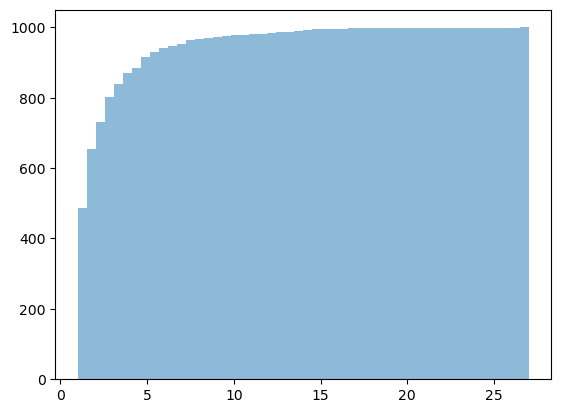

(array([ 445.,  591.,  702.,  754.,  811.,  847.,  878.,  897.,  918.,
         926.,  941.,  950.,  951.,  957.,  963.,  968.,  970.,  973.,
         977.,  981.,  982.,  982.,  982.,  986.,  986.,  987.,  989.,
         990.,  991.,  992.,  994.,  994.,  996.,  996.,  997.,  997.,
         997.,  997.,  997.,  999.,  999.,  999.,  999.,  999.,  999.,
         999.,  999.,  999.,  999., 1000.]),
 array([ 1.  ,  1.46,  1.92,  2.38,  2.84,  3.3 ,  3.76,  4.22,  4.68,
         5.14,  5.6 ,  6.06,  6.52,  6.98,  7.44,  7.9 ,  8.36,  8.82,
         9.28,  9.74, 10.2 , 10.66, 11.12, 11.58, 12.04, 12.5 , 12.96,
        13.42, 13.88, 14.34, 14.8 , 15.26, 15.72, 16.18, 16.64, 17.1 ,
        17.56, 18.02, 18.48, 18.94, 19.4 , 19.86, 20.32, 20.78, 21.24,
        21.7 , 22.16, 22.62, 23.08, 23.54, 24.  ]),
 <BarContainer object of 50 artists>)

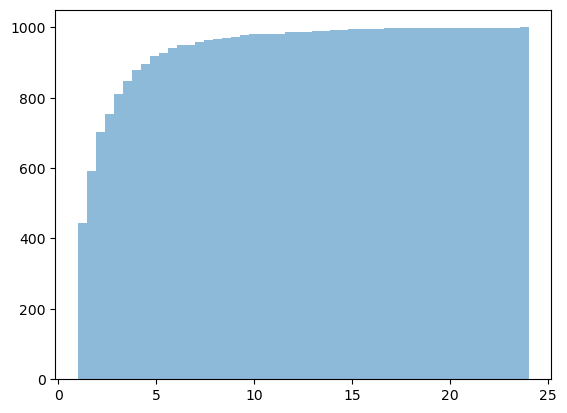

In [4]:
plt.hist(height_ratios, bins=50, alpha=0.5, label='Height Ratios',cumulative=True)
plt.show()
plt.hist(width_ratios, bins=50, alpha=0.5, label='Width Ratios',cumulative=True)

In [1]:
from functions import *
# create fake examples like [(input1, output1),(input2, output2),...]
fake_examples = [([[1,2],[3,4]], [[1,2,3],[3,4,5]]), ([[2,3],[4,5]], [[6,1],[9,5]])]
# _, tokenizer = FastModel.from_pretrained(
#     model_name = "unsloth/gemma-3-4b-pt-unsloth-bnb-4bit",
#     max_seq_length = 8192, # Choose any for long context!
#     load_in_4bit = True,
#     resize_model_vocab=24,
# )


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [2]:
# tokenize the fake examples
inputs = tokenize_features2(fake_examples, max_length=100, background_color=0, IsDecode=False, max_k=5)

In [6]:
input_tokens, target_tokens, features, rows, cols = inputs
for i in range(target_tokens.shape[0]):
    if i < len(input_tokens):
        print(input_tokens[i].item(), target_tokens[i].item())
    else:
        print("   ",target_tokens[i].item())

10 -100
15 -100
15 -100
12 -100
15 -100
15 -100
12 -100
11 -100
16 19
17 20
13 -100
15 -100
15 -100
15 -100
12 -100
15 -100
15 -100
15 -100
12 -100
14 -100
10 -100
15 -100
15 -100
12 -100
15 -100
15 -100
12 -100
11 -100
16 19
17 19
    6
    1
    9
    5


In [5]:
rows, cols

(tensor([0., 0., 1., 1.], dtype=torch.bfloat16),
 tensor([0., 1., 0., 1.], dtype=torch.bfloat16))

In [8]:
features.shape, torch.sum(input_tokens == 15)

(torch.Size([14, 162]), tensor(14))

In [4]:
for i in range(inputs['input_tokens'].shape[1]):
    print(inputs['input_tokens'][0][i].item(), inputs['target_tokens'][0][i].item(), inputs['row_indices'][i].item(), inputs['col_indices'][i].item())

10 1 0 0
1 2 1 1
2 12 1 2
12 3 0 0
3 4 2 1
4 12 2 2
12 11 0 0
11 13 0 0
13 1 0 0
1 2 1 1
2 3 1 2
3 12 1 3
12 3 0 0
3 4 2 1
4 5 2 2
5 12 2 3
12 14 0 0
14 10 0 0
10 2 0 0
2 3 1 1
3 12 1 2
12 4 0 0
4 5 2 1
5 12 2 2
12 11 0 0
11 13 0 0
13 6 0 0
6 1 1 1
1 12 1 2
12 9 0 0
9 5 2 1
5 12 2 2
12 14 0 0
14 -100 0 0


In [6]:
# %debug
layers = 1
heads = 1
max_height_delta1 = 5  # For within-grid attention
max_width_delta1 = 5
max_height_delta2 = 6  # For across-grid attention
max_width_delta2 = 6

attention = MultiGridAttention(
    layers=layers,
    heads=heads,
    max_height_delta1=max_height_delta1,
    max_width_delta1=max_width_delta1,
    max_height_delta2=max_height_delta2,
    max_width_delta2=max_width_delta2
)

# Create a simple test case with two grids (input and output)
# Input grid: 2x2
# Output grid: 2x2
# Plus special tokens (row=0)

# Create coordinates
rows = torch.tensor([
    0,  # special token
    1, 1, 0, 2, 2, 0, # input grid (2x2)
    0,  # special token
    1, 1, 1, 0, 2, 2, 2, 0,  # output grid (3x3)
])

cols = torch.tensor([
    0,  # special token
    1, 2, 0, 1, 2, 0,  # input grid (2x2)
    0,  # special token
    1, 2, 3, 0, 1, 2, 3, 0,  # output grid (2x2)
])

# Lengths for each grid (including special tokens)
# Format: [input_special, input_grid, output_special, output_grid]
lengths = [7, 9]  # Each special token is length 1, each grid is length 4

# Get attention biases
attention_biases = attention(rows, cols, lengths)

In [11]:
attention_biases.sum().backward()
print(attention.within_grid_attn.relative_position_bias.grad)
print(attention.across_grid_attn.relative_position_bias.grad)

tensor([[[[10.,  0.,  0.,  2.,  6.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 5.,  3.,  1.,  1.,  3.]]]])
tensor([[[[0., 0., 0., 0., 0., 0.],
          [0., 1., 2., 2., 1., 0.],
          [0., 2., 4., 4., 2., 0.],
          [0., 1., 2., 2., 1., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]]]])


(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': 'Attention Scores'}, xlabel='Token Position (Column)', ylabel='Token Position (Row)'>)

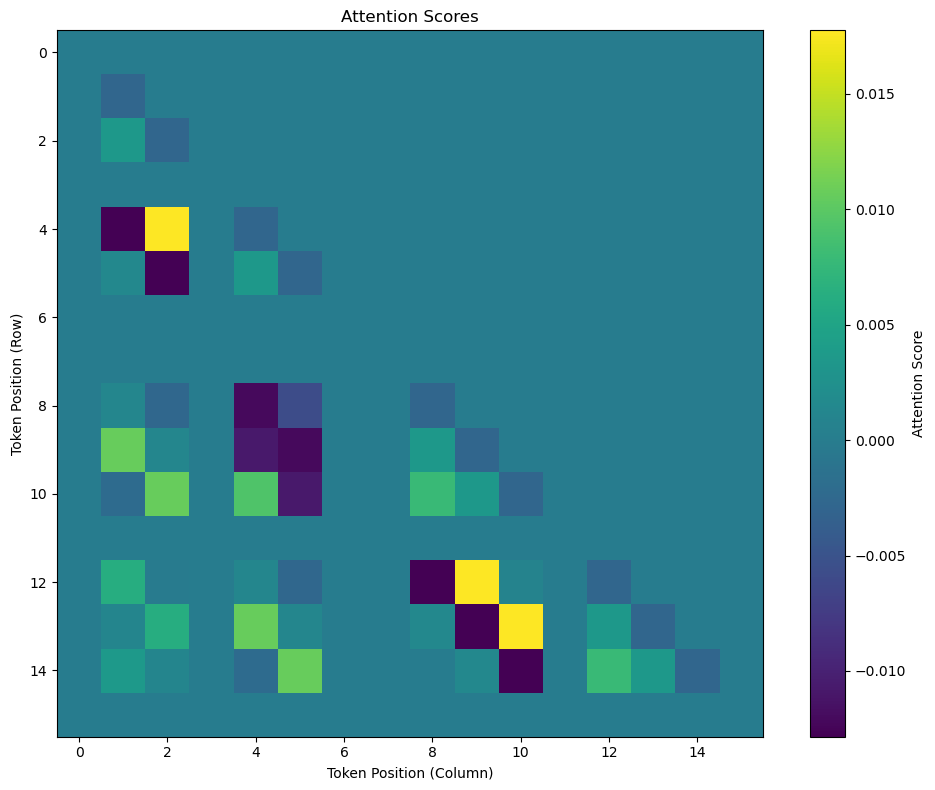

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# Create a masked version of attention scores to better visualize
# by filtering out the very negative values (future attention)
def plot_attention_heatmap(attention_scores, title="Attention Scores", mask_negative=True):
    # Create a copy of the attention scores
    scores = attention_scores[0, 0, :, :].detach().cpu().numpy()
    
    # Mask extremely negative values (typically used to prevent future attention)
    if mask_negative:
        # Replace very negative values with a small negative number for better visualization
        min_normal_value = -1  # Threshold for what we consider "extremely negative"
        scores = np.where(scores < min_normal_value, 0, scores)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the attention scores as a heatmap
    im = ax.imshow(scores, cmap='viridis')
    
    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Attention Score')
    
    # Add labels and title
    ax.set_title(title)
    ax.set_xlabel('Token Position (Column)')
    ax.set_ylabel('Token Position (Row)')
    
    # Show the plot
    plt.tight_layout()
    return fig, ax

plot_attention_heatmap(attention_biases)

In [1]:
from features_optimized import *
import numpy as np
# Create a 30x30 random grid with values between 0 and 9
test_grid = np.random.randint(0, 10, size=(30, 30)).tolist()

# Extract features
# test_causality_constraint(test_grid)
optimized_features = extract_features(test_grid, background_color=0)

In [2]:
optimized_features.shape

(900, 162)

In [10]:
%%timeit
out = extract_features_original(test_grid, max_k=7, background_color=0)

319 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
out = extract_features(test_grid, max_k=7, background_color=0)

321 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
from features import extract_features as extract_features_original
from features import extract_causal_features as extract_causal_features_original

# Compare results
original_features = extract_features_original(test_grid, max_k=7, background_color=0)
optimized_features = extract_features(test_grid, max_k=7, background_color=0)
assert np.allclose(original_features, optimized_features), "Non-causal features differ!"

# original_causal_features = extract_causal_features_original(test_grid)
# optimized_causal_features = extract_causal_features(test_grid)
# assert np.allclose(original_causal_features, optimized_causal_features), "Causal features differ!"

print("All feature comparisons passed!")

All feature comparisons passed!


In [ ]:
a = torch.randn(1, 3, 2, requires_grad=True)
b = torch.randn(1, 2, 2, requires_grad=True) # Or a subset matching the mask
mask = torch.tensor([True, False, True]).view(1, 3, 1)


print("Original a:\n", a)
print("Original b:\n", b)
print("Mask:\n", mask)

c = a.clone()
c.masked_scatter_(mask, b)

# Option 2: In-place modification (less common for this exact grad flow)
# If you were to do a truly in-place operation like a[mask] = b[mask]
# directly, it might not give the exact gradient behavior you're looking for
# for 'a' if 'b' also requires grad and you want 'a's original parts to get grad.
# torch.where is preferred for your stated goal.

print("\nResult c (from torch.where):\n", c)

# --- Gradient Check ---
# Example: Compute a sum and backpropagate
loss = c.sum()
loss.backward()

print("\nGradient for a:\n", a.grad)
print("Gradient for b:\n", b.grad)

Original a:
 tensor([[[-0.8981,  0.4294],
         [-1.0543,  0.5937],
         [ 0.2282, -0.7374]]], requires_grad=True)
Original b:
 tensor([[[-1.1300,  2.4805],
         [-0.0409,  0.4796]]], requires_grad=True)
Mask:
 tensor([[[ True],
         [False],
         [ True]]])

Result c (from torch.where):
 tensor([[[-1.1300,  2.4805],
         [-1.0543,  0.5937],
         [-0.0409,  0.4796]]], grad_fn=<MaskedScatterBackward0>)

Gradient for a:
 tensor([[[0., 0.],
         [1., 1.],
         [0., 0.]]])
Gradient for b:
 tensor([[[1., 1.],
         [1., 1.]]])
